## PHYS 105A:  Introduction to Scientific Computing

# Numerical Integrator

In this assignment, we will see some of the limitations on numerical integrators, and find ways to improve them.

In [1]:
# Step 1. Import Libraries

import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Step 2. Define standard numerical integrals
#
# There is nothing complicated that you need to do here.
# Simply copy and paste the functions in the lecture note from last week.

def trapezoidal(f, N=8, a=0, b=1):
    ______

def Simpson(f, N=8, a=0, b=1):
    ______

def Bode(f, N=8, a=0, b=1):
    ______

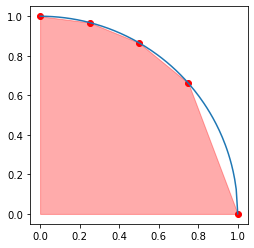

In [3]:
# Step 3. Define a function that breaks our integrators...
#
# Since we have worked on integrating pi for many times, let's define a quarter circle again!

def h(x):
    return np.sqrt(1 - x * x)

X = np.linspace(0, 1, 5)
Y = h(X)

x = np.linspace(0, 1, 129) # define a fine grid for plotting
plt.plot(x, h(x))
plt.scatter(X, Y, color='r')
plt.fill_between(X, h(X), color='r', alpha=0.33)
plt.gca().set_aspect('equal')

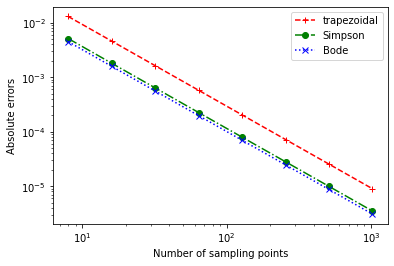

In [4]:
# Step 4. Apply the integrators

Ns = [8, 16, 32, 64, 128, 256, 512, 1024]

err_t = [abs(trapezoidal(h, N) - np.pi/4) for N in Ns]
err_S = [abs(Simpson(h, N)     - np.pi/4) for N in Ns]
err_B = [abs(Bode(h, N)        - np.pi/4) for N in Ns]

plt.loglog(Ns, err_t, '+--', color='r', label='trapezoidal')
plt.loglog(Ns, err_S, 'o-.', color='g', label='Simpson')
plt.loglog(Ns, err_B, 'x:',  color='b', label='Bode')
plt.xlabel('Number of sampling points')
plt.ylabel('Absolute errors')
plt.legend()

What is the convergent rate?  Is this expected?  Please write down your answers below.

#________

In [5]:
# Step 5. Idea: use smaller steps as we apporach one.

def trapezoidal_adaptive(h, N):
    ________
    
def Simpson_adaptive(h, N):
    N = N//2 # Why do we need to divid by 2?
    X = np.sin(np.pi/2 * np.arange(N+1)/N) # what is the distribution of grid points look like?
    S = 0
    for i in range(N):
        S += Simpson(h, N=2, a=X[i], b=X[i+1])
    return S

def Bode_adaptive(h, N):
    ________

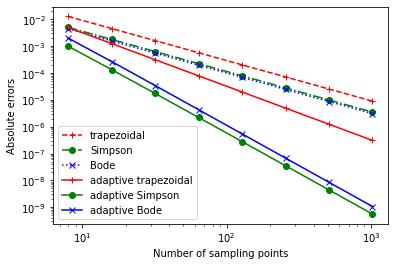

In [6]:
# Step 6. Test the result

Ns = [8, 16, 32, 64, 128, 256, 512, 1024]

err_ta = [abs(trapezoidal_adaptive(h, N) - np.pi/4) for N in Ns]
err_Sa = [abs(Simpson_adaptive(h, N)     - np.pi/4) for N in Ns]
err_Ba = [abs(Bode_adaptive(h, N)        - np.pi/4) for N in Ns]

plt.loglog(Ns, err_t,  '+--', color='r', label='trapezoidal')
plt.loglog(Ns, err_S,  'o-.', color='g', label='Simpson')
plt.loglog(Ns, err_B,  'x:',  color='b', label='Bode')
plt.loglog(Ns, err_ta, '+-',  color='r', label='adaptive trapezoidal')
plt.loglog(Ns, err_Sa, 'o-',  color='g', label='adaptive Simpson')
plt.loglog(Ns, err_Ba, 'x-',  color='b', label='adaptive Bode')
plt.xlabel('Number of sampling points')
plt.ylabel('Absolute errors')
plt.legend()

What is the convergent rate?  Is this expected?  Please write down your answers below.

#________